In [15]:
# Data manipulation
import pandas as pd # data manipulation and dataframes

# Data visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import calendar

In [16]:
# Pandas configuration
pd.set_option('display.max_columns', None)  # shows all columns
pd.set_option('display.max_colwidth', None)  # shows all cell content

In [17]:
# Reads csv
airbnb_madrid = pd.read_csv('../raw/eda-result/airbnb_madrid.csv', encoding='utf-8')
listings = pd.read_csv('../raw/airbnb/madrid/listings.csv', encoding='utf-8')

In [18]:
listings.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,Rental unit in Madrid · ★4.87 · 1 bedroom · 1 bed · 1 private bath,13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,90,4,104,2023-05-31,0.65,1,98,9,NaN


In [19]:
len(listings['name'].unique().tolist())

6826

In [20]:
airbnb_madrid.head(1)

,Description,Score,Facilities,District,Neighbourhood,Room type,Price,Minimum nights,Host name,Number of reviews,Last review,Latitude,Longitude
0,Rental unit in madrid,★4.87,"1 bedroom, 1 bed, 1 private bath",Chamartín,Hispanoamérica,Private room,90,4,Simon,104,2023-05-31,40.45724,-3.67688


In [21]:
#airbnb_madrid['Last review'] = airbnb_madrid['Last review'].fillna('2023-07-26')
airbnb_madrid = airbnb_madrid.dropna()

In [22]:
airbnb_madrid["Last review"] = pd.to_datetime(airbnb_madrid["Last review"])
airbnb_madrid['Year'] = airbnb_madrid['Last review'].dt.strftime('%Y')


In [23]:
airbnb_madrid[airbnb_madrid['Last review'].dt.year == 2018].value_counts().sum()

445

In [24]:
airbnb_madrid['Last review'].dt.year.unique().tolist()

[2023, 2018, 2022, 2017, 2021, 2019, 2016, 2012, 2015, 2020, 2014, 2013]

In [25]:
months = airbnb_madrid['Last review'].dt.month.unique().tolist()

In [26]:
airbnb_madrid['Last review'].dt.month[airbnb_madrid['Last review'].dt.year == 2022].value_counts().sum()

2072

In [27]:
districts = airbnb_madrid['District'].unique().tolist()

In [28]:
total_airbnbs_by_month_2022 = {'Month': [], 'Airbnb reviews': []}

for m in months:
    total_airbnbs_by_month_2022['Month'].append(m)
    total_airbnbs_by_month_2022['Airbnb reviews'].append(airbnb_madrid[(airbnb_madrid['Last review'].dt.year == 2022) & (airbnb_madrid['Last review'].dt.month == m)].value_counts().sum())

total_airbnbs_by_month_2023 = {'Month': [], 'Airbnb reviews': []}

for m in months:
    total_airbnbs_by_month_2023['Month'].append(m)
    total_airbnbs_by_month_2023['Airbnb reviews'].append(airbnb_madrid[(airbnb_madrid['Last review'].dt.year == 2023) & (airbnb_madrid['Last review'].dt.month == m)].value_counts().sum())

In [29]:
total_airbnbs_by_month_2022

{'Month': [5, 7, 6, 9, 4, 12, 8, 11, 1, 2, 3, 10],
 'Airbnb reviews': [112, 278, 117, 227, 74, 267, 271, 262, 59, 44, 50, 311]}

In [30]:
total_airbnbs_by_month_2022 = pd.DataFrame.from_dict(total_airbnbs_by_month_2022)
total_airbnbs_by_month_2022

,Month,Airbnb reviews
0,5,112
1,7,278
2,6,117
3,9,227
4,4,74
5,12,267
6,8,271
7,11,262
8,1,59
9,2,44


In [31]:
total_airbnbs_by_month_2023

{'Month': [5, 7, 6, 9, 4, 12, 8, 11, 1, 2, 3, 10],
 'Airbnb reviews': [6725, 0, 4040, 0, 1347, 0, 0, 0, 423, 358, 516, 0]}

In [32]:
df2022 = pd.DataFrame.from_dict(total_airbnbs_by_month_2022)
df2022 = df2022.sort_values(by=['Month'])
df2022

,Month,Airbnb reviews
8,1,59
9,2,44
10,3,50
4,4,74
0,5,112
2,6,117
1,7,278
6,8,271
3,9,227
11,10,311


In [33]:
df2023 = pd.DataFrame.from_dict(total_airbnbs_by_month_2023)
df2023 = df2023.sort_values(by=['Month'])
df2023

,Month,Airbnb reviews
8,1,423
9,2,358
10,3,516
4,4,1347
0,5,6725
2,6,4040
1,7,0
6,8,0
3,9,0
11,10,0


In [34]:
list_months_2022 = ['January 2022', 'February 2022', 'March 2022', 'April 2022', 'May 2022', 'June 2022', 'July 2022', 'August 2022', 'September 2022', 'October 2022', 'November 2022', 'December 2022']

In [35]:
df2022['Month'] = list_months_2022
df2022

,Month,Airbnb reviews
8,January 2022,59
9,February 2022,44
10,March 2022,50
4,April 2022,74
0,May 2022,112
2,June 2022,117
1,July 2022,278
6,August 2022,271
3,September 2022,227
11,October 2022,311


In [36]:
list_months_2023 = ['January 2023', 'February 2023', 'March 2023', 'April 2023', 'May 2023', 'June 2023', 'July 2023', 'August 2023', 'September 2023', 'October 2023', 'November 2023', 'December 2023']

In [37]:
df2023['Month'] = list_months_2023
df2023

,Month,Airbnb reviews
8,January 2023,423
9,February 2023,358
10,March 2023,516
4,April 2023,1347
0,May 2023,6725
2,June 2023,4040
1,July 2023,0
6,August 2023,0
3,September 2023,0
11,October 2023,0


In [38]:
frames = [df2022, df2023]

result = pd.concat(frames)

In [39]:
result = result.loc[(result!=0).all(axis=1)]
result.to_csv('../raw/eda-result/reviews_per_month_airbnb.csv', index = False, sep = ',')
result


,Month,Airbnb reviews
8,January 2022,59
9,February 2022,44
10,March 2022,50
4,April 2022,74
0,May 2022,112
2,June 2022,117
1,July 2022,278
6,August 2022,271
3,September 2022,227
11,October 2022,311


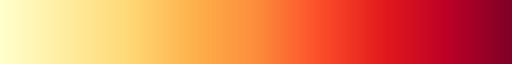

In [40]:
cmap_mpl = plt.get_cmap("YlOrRd")
cmap_mpl

In [41]:
fig = px.histogram(result, x=result['Month'], y=result['Airbnb reviews'], text_auto='.2s', color=result['Month'])
fig.update_traces(textfont_size=12, textangle=0, textposition='outside', cliponaxis=False)


fig.show()